## Part 1 : Implanting K-means clustering algorithm

### 1.1 Let’s assume K=3. Please implement K-means clustering algorithm from scratch. Put random seed as ‘123’.

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [4]:
def kmeans(X, k, max_iters=100):
    np.random.seed(123)
    
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [5]:
# Load and preprocess the data
data = pd.read_csv('cluster_data1.csv')
X = data.values

In [6]:
# Apply K-means clustering
k = 3
labels, centroids = kmeans(X, k)

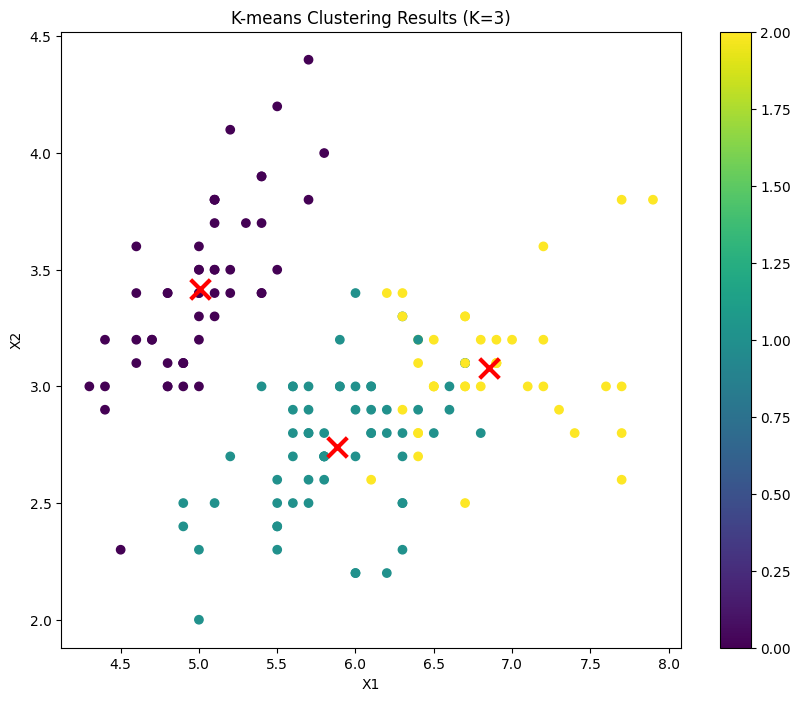

In [7]:
# Visualize the results (using the first two features)
plt.figure(figsize=(10, 8))
scatter = plt.scatter(X[:, 0], X[:, 1], c=labels, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.colorbar(scatter)
plt.title('K-means Clustering Results (K=3)')
plt.xlabel('X1')
plt.ylabel('X2')
plt.show()

In [8]:
# Print cluster assignments and centroids
print("Cluster assignments:")
print(labels)
print("\nFinal centroids:")
print(centroids)

Cluster assignments:
[2 2 1 2 1 2 2 0 0 0 1 1 1 1 1 0 0 2 0 0 2 1 1 0 1 0 2 0 0 1 2 0 0 0 1 1 1
 2 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 2 1 1 2 0 2 0 1 0 0 0 2 0 2
 0 1 1 2 1 1 0 1 2 2 2 2 0 1 1 1 0 0 1 1 2 1 1 1 1 1 2 2 2 0 2 1 2 1 1 1 0
 2 0 2 0 2 1 1 2 2 0 2 1 2 2 0 0 1 1 1 0 0 2 1 2 1 1 0 0 1 1 2 1 2 1 0 0 2
 0 0]

Final centroids:
[[5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


### 1.2 Please plot the location of k centroids and their assignment for each cluster in 2D with different colors to distinguish each cluster and its centroid for the first 5 steps (the initial setting of the centroids, Then, after iteration 1/2/3/4). In your plot, set x-axis as ‘X1’ and y-axis as ‘X2’ as the below figure.

In [10]:
def kmeans_with_steps(X, k, max_iters=100):
    np.random.seed(123)
    
    # Randomly initialize centroids
    centroids = X[np.random.choice(X.shape[0], k, replace=False)]
    
    steps = [(np.zeros(X.shape[0]), centroids.copy())]  # Initial step
    
    for i in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([X[labels == j].mean(axis=0) for j in range(k)])
        
        # Store the step
        steps.append((labels, new_centroids.copy()))
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return steps

In [11]:
# Load and preprocess the data
data = pd.read_csv('cluster_data1.csv')
X = data.values[:, :4]  # Use only the first two features

In [12]:
# Apply K-means clustering
k = 3
steps = kmeans_with_steps(X, k)

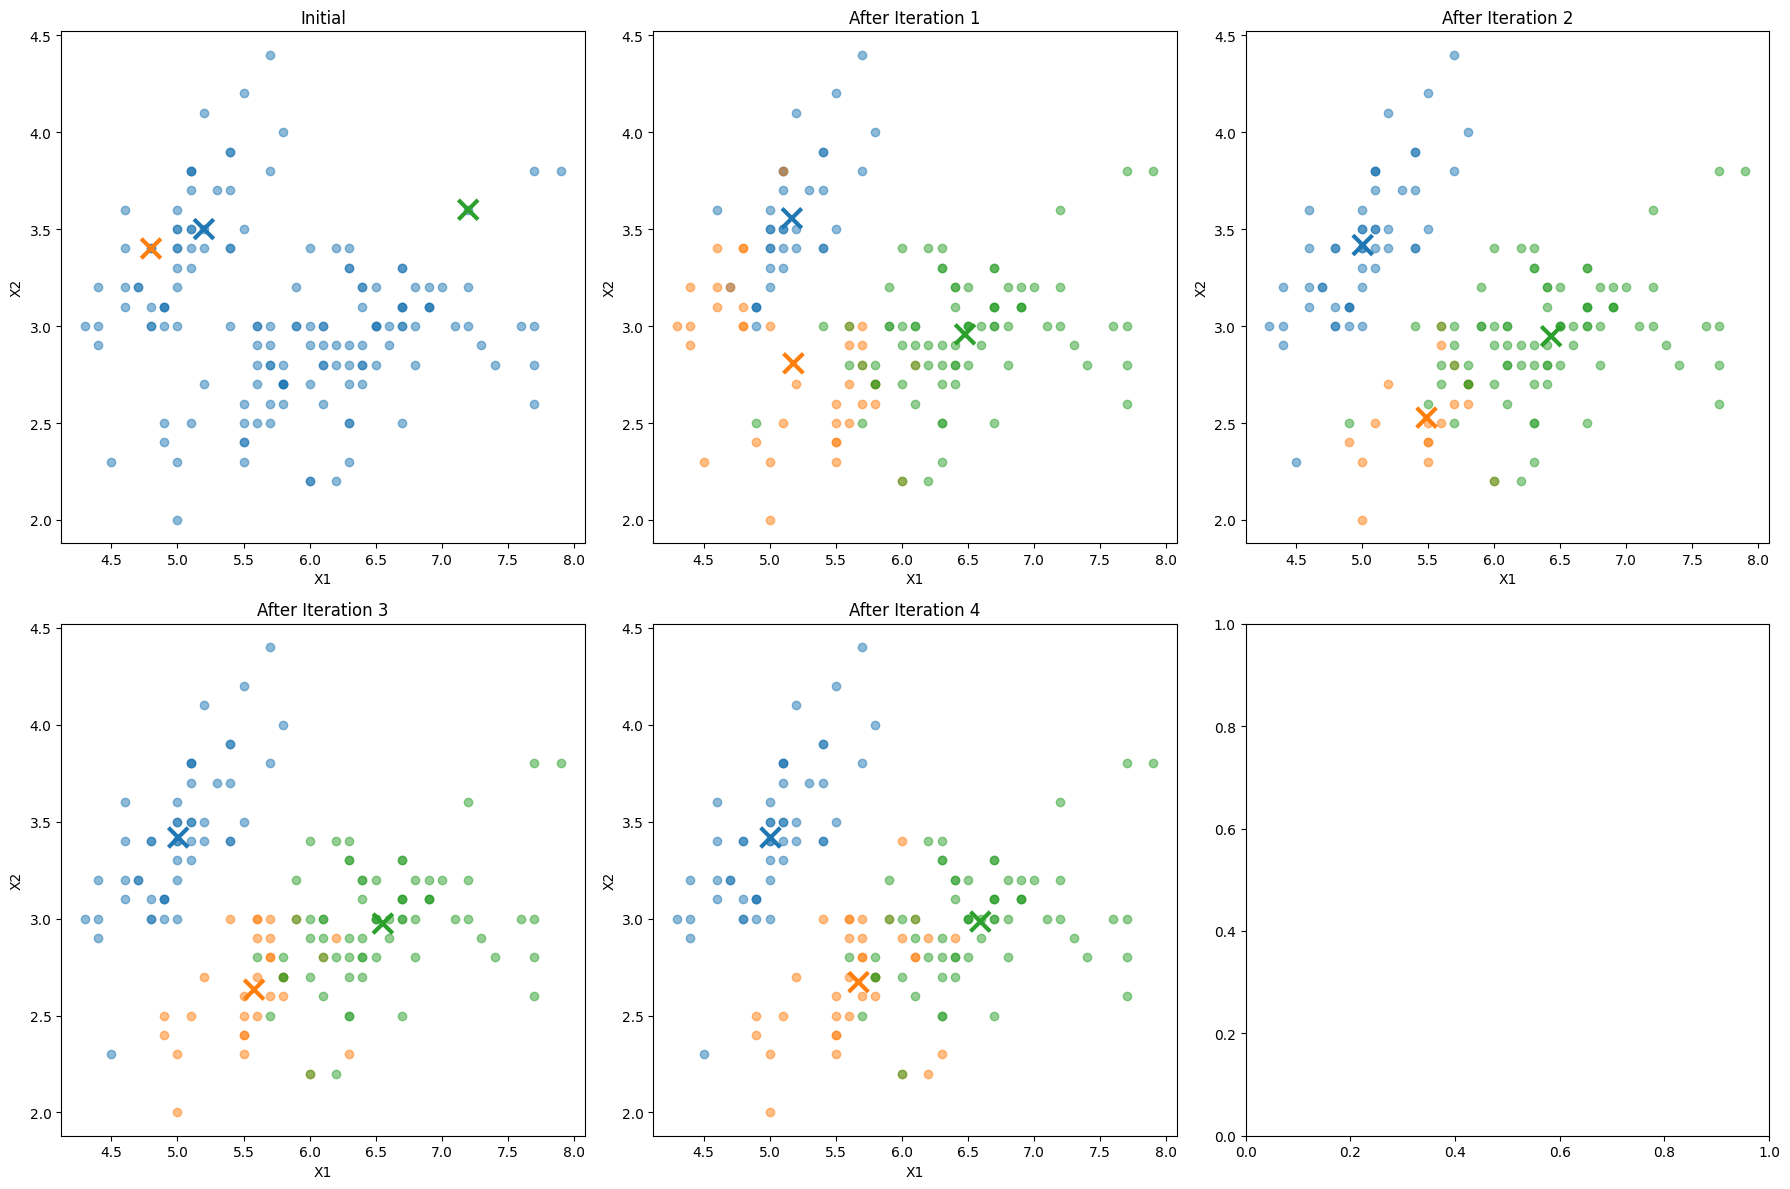

Final cluster assignments:
[2 2 1 2 1 2 2 0 0 0 1 1 1 1 1 0 0 2 0 0 2 1 1 0 1 0 2 0 0 1 2 0 0 0 1 1 1
 2 0 1 0 0 0 1 0 1 0 0 1 1 1 1 1 1 1 1 0 1 0 0 2 1 1 2 0 2 0 1 0 0 0 2 0 2
 0 1 1 2 1 1 0 1 2 2 2 2 0 1 1 1 0 0 1 1 2 1 1 1 1 1 2 2 2 0 2 1 2 1 1 1 0
 2 0 2 0 2 1 1 2 2 0 2 1 2 2 0 0 1 1 1 0 0 2 1 2 1 1 0 0 1 1 2 1 2 1 0 0 2
 0 0]

Final centroids:
[[5.006      3.418      1.464      0.244     ]
 [5.88360656 2.74098361 4.38852459 1.43442623]
 [6.85384615 3.07692308 5.71538462 2.05384615]]


In [13]:
# Visualize the first 5 steps
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
step_titles = ['Initial', 'After Iteration 1', 'After Iteration 2', 'After Iteration 3', 'After Iteration 4']

for i, (labels, centroids) in enumerate(steps[:5]):
    ax = axes[i]
    for j in range(k):
        cluster_points = X[labels == j]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colors[j]], alpha=0.5)
    ax.scatter(centroids[:, 0], centroids[:, 1], c=colors, marker='x', s=200, linewidths=3)
    ax.set_title(step_titles[i])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

# Print final cluster assignments and centroids
print("Final cluster assignments:")
print(steps[-1][0])
print("\nFinal centroids:")
print(steps[-1][1])

## Part 2. Implanting K-means++ clustering algorithm and finding K

### 2.1 Please implement K-means++ algorithm from scratch. Put random seed as ‘123’. Please plot the location of k centroids and their assignment for each cluster in 2D with different colors to distinguish each cluster and its centroid for the first 5 steps (the initial setting of the centroids, Then, after iteration 1/2/3/4). In your plot, set x-axis as ‘X1’ and y-axis as ‘X2’ as the above figure.

In [16]:
def kmeans_plus_plus_init(X, k):
    np.random.seed(123)
    centroids = [X[np.random.randint(X.shape[0])]]
    
    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in X])
        probs = dist_sq / dist_sq.sum()
        cumprobs = probs.cumsum()
        r = np.random.rand()
        centroids.append(X[np.argmax(cumprobs >= r)])
    
    return np.array(centroids)

In [17]:
def kmeans_plus_plus_with_steps(X, k, max_iters=100):
    # Initialize centroids using K-means++
    centroids = kmeans_plus_plus_init(X, k)
    
    steps = [(np.zeros(X.shape[0]), centroids.copy())]  # Initial step
    
    for _ in range(max_iters):
        # Assign each point to the nearest centroid
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        # Update centroids
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        # Store the step
        steps.append((labels, new_centroids.copy()))
        
        # Check for convergence
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return steps

In [18]:
# Load and preprocess the data
data = pd.read_csv('cluster_data1.csv')
X = data.values[:, :4]  # Use only the first two features

In [19]:
# Apply K-means++ clustering
k = 3
steps = kmeans_plus_plus_with_steps(X, k)

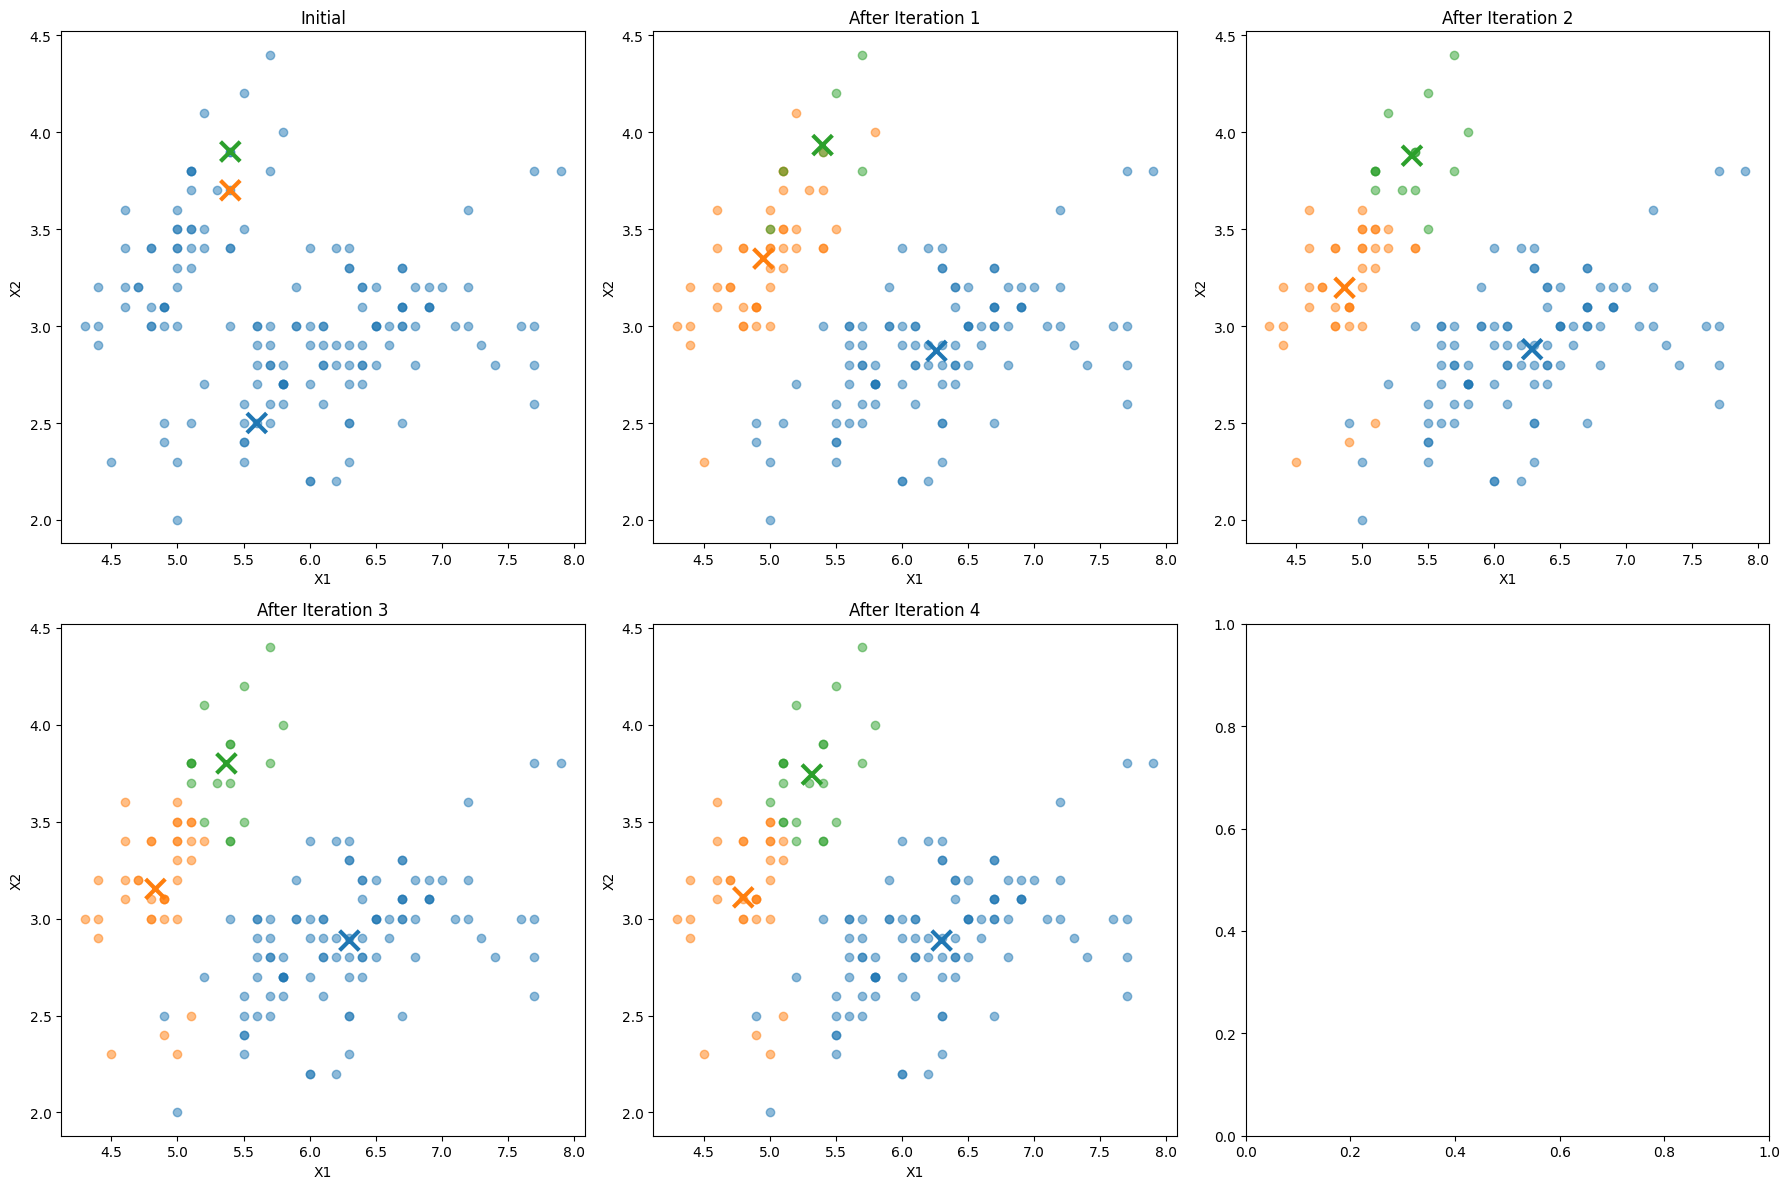

Final cluster assignments:
[0 0 0 0 0 0 0 1 1 1 0 0 1 0 0 2 1 0 2 2 0 0 0 1 0 1 0 2 2 0 0 1 1 1 0 0 0
 0 1 0 2 2 1 0 2 0 1 1 0 0 0 0 0 0 0 0 2 0 2 1 0 0 0 0 1 0 1 0 1 1 1 0 2 0
 2 1 0 0 0 0 1 0 0 0 0 0 2 0 0 0 2 2 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 1
 0 1 0 2 0 0 0 0 0 2 0 1 0 0 2 1 0 0 0 1 2 0 0 0 0 0 1 2 0 0 0 0 0 0 2 2 0
 2 2]

Final centroids:
[[6.30103093 2.88659794 4.95876289 1.69587629]
 [4.77586207 3.07241379 1.62068966 0.29655172]
 [5.28333333 3.70833333 1.49166667 0.27916667]]


In [20]:
# Visualize the first 5 steps
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.ravel()

colors = ['#1f77b4', '#ff7f0e', '#2ca02c']
step_titles = ['Initial', 'After Iteration 1', 'After Iteration 2', 'After Iteration 3', 'After Iteration 4']

for i, (labels, centroids) in enumerate(steps[:5]):
    ax = axes[i]
    for j in range(k):
        cluster_points = X[labels == j]
        ax.scatter(cluster_points[:, 0], cluster_points[:, 1], c=[colors[j]], alpha=0.5)
    ax.scatter(centroids[:, 0], centroids[:, 1], c=colors, marker='x', s=200, linewidths=3)
    ax.set_title(step_titles[i])
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')

plt.tight_layout()
plt.show()

# Print final cluster assignments and centroids
print("Final cluster assignments:")
print(steps[-1][0])
print("\nFinal centroids:")
print(steps[-1][1])

## Part 3. Implanting KNN classification

### 3.1 Please implement KNN classification algorithm from scratch. Please assign class for each data point based on the result of problem #2 using K-NN method.

In [23]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [24]:
def euclidean_distance(x1, x2):
    return np.sqrt(np.sum((x1 - x2) ** 2))

In [25]:
def knn_classify(X_train, y_train, X_test, k=3):
    y_pred = []
    
    for x_test in X_test:
        distances = [euclidean_distance(x_test, x_train) for x_train in X_train]
        k_indices = np.argsort(distances)[:k]
        k_nearest_labels = y_train[k_indices]
        most_common = np.bincount(k_nearest_labels).argmax()
        y_pred.append(most_common)
    
    return np.array(y_pred)

In [26]:
# Load the data
data = pd.read_csv('cluster_data2.csv')
X = data.values

In [27]:
# Normalize the features
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

In [28]:
# Implement K-means++ for clustering the data
def kmeans_plus_plus_init(X, k):
    np.random.seed(123)
    centroids = [X[np.random.randint(X.shape[0])]]
    
    for _ in range(1, k):
        dist_sq = np.array([min([np.inner(c-x, c-x) for c in centroids]) for x in X])
        probs = dist_sq / dist_sq.sum()
        cumprobs = probs.cumsum()
        r = np.random.rand()
        centroids.append(X[np.argmax(cumprobs >= r)])
    
    return np.array(centroids)

In [29]:
def kmeans_plus_plus(X, k, max_iters=100):
    centroids = kmeans_plus_plus_init(X, k)
    
    for _ in range(max_iters):
        distances = np.sqrt(((X - centroids[:, np.newaxis])**2).sum(axis=2))
        labels = np.argmin(distances, axis=0)
        
        new_centroids = np.array([X[labels == i].mean(axis=0) for i in range(k)])
        
        if np.all(centroids == new_centroids):
            break
        
        centroids = new_centroids
    
    return labels, centroids

In [30]:
# Perform K-means++ clustering on the entire dataset
k = 3
labels, centroids = kmeans_plus_plus(X_normalized, k)

In [31]:
# Perform KNN classification on the entire dataset
k_neighbors = 3
y_pred = knn_classify(X_normalized, labels, X_normalized, k=k_neighbors)

In [32]:
# Print results
print("Predicted classes for all data points:")
for i, pred in enumerate(y_pred):
    print(f"Data point {i+1}: Class {pred}")

Predicted classes for all data points:
Data point 1: Class 2
Data point 2: Class 2
Data point 3: Class 0
Data point 4: Class 0
Data point 5: Class 0
Data point 6: Class 0
Data point 7: Class 2
Data point 8: Class 0
Data point 9: Class 2
Data point 10: Class 0
Data point 11: Class 0
Data point 12: Class 0
Data point 13: Class 2
Data point 14: Class 0
Data point 15: Class 0


In [33]:
# Calculate and print the centroids of each cluster
print("\nCentroids of each cluster (in normalized feature space):")
for i, centroid in enumerate(centroids):
    print(f"Cluster {i}: {centroid}")


Centroids of each cluster (in normalized feature space):
Cluster 0: [ 0.62700073 -0.63844324  0.67057098  0.64847358]
Cluster 1: [-0.94848837  2.0907262  -1.36685821 -1.28879596]
Cluster 2: [-1.33037973  1.07342654 -1.33471289 -1.29898496]


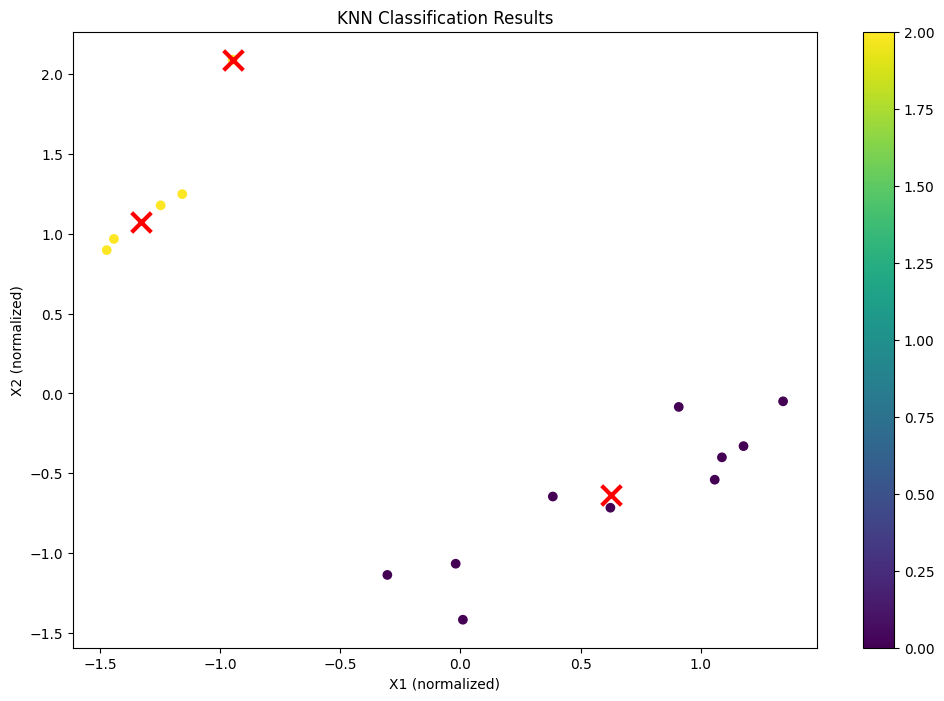

In [34]:
# Visualize the results
plt.figure(figsize=(12, 8))
scatter = plt.scatter(X_normalized[:, 0], X_normalized[:, 1], c=y_pred, cmap='viridis')
plt.scatter(centroids[:, 0], centroids[:, 1], c='red', marker='x', s=200, linewidths=3)
plt.colorbar(scatter)
plt.title('KNN Classification Results')
plt.xlabel('X1 (normalized)')
plt.ylabel('X2 (normalized)')
plt.show()

In [35]:
# Transform centroids back to original feature space
centroids_original = scaler.inverse_transform(centroids)
print("\nCentroids of each cluster (in original feature space):")
for i, centroid in enumerate(centroids_original):
    print(f"Cluster {i}: {centroid}")


Centroids of each cluster (in original feature space):
Cluster 0: [6.262 2.872 4.906 1.676]
Cluster 1: [5.21 3.65 1.42 0.25]
Cluster 2: [4.955  3.36   1.475  0.2425]


In [36]:
# Add predictions to the original data and save to a new CSV file
data['Predicted_Class'] = y_pred
data.to_csv('cluster_data2_with_predictions.csv', index=False)
print("\nPredictions have been added to the data and saved in 'cluster_data2_with_predictions.csv'")


Predictions have been added to the data and saved in 'cluster_data2_with_predictions.csv'
